In [4]:
import numpy as np
df_path = './datas/De_embedding/NL60MP50P18_De_embedded.csv'
df = np.loadtxt(fname=df_path,delimiter=' ',skiprows=3)

In [6]:
import os

def get_allcsv(dir):
    csv_files = []
    for file in os.listdir(dir):
        if file.endswith('.csv'):
            csv_files.append(os.path.join(dir,file))
    return csv_files

In [7]:
dir = './datas/De_embedding'

In [9]:
files = get_allcsv(dir=dir)

In [51]:
# data = None
data = []
for f in files:
    aa = np.loadtxt(fname=df_path,delimiter=' ',skiprows=3)[:,1:]
    s1 = np.vectorize(complex)(aa[:,0],aa[:,1])
    y1 = (1-s1)/(50*(1+s1))
    y11 = np.array((np.log10(y1).real, np.log10(y1).imag)).T
    data.append(y11)
data = np.array(data)
    # if data is None:
    #     data = aa
    # else:   data = np.dstack((data,aa)) #维度不可更改，默认在最后扩维

In [52]:
musi_ap = './datas/input/7p9w_log.npymusi.csv'
musi = np.loadtxt(musi_ap)
mu = musi[:2]
si = musi[6:8]
data = (data - mu) / si

In [49]:
traset = np.load('./datas/input/vali_logn.npy')

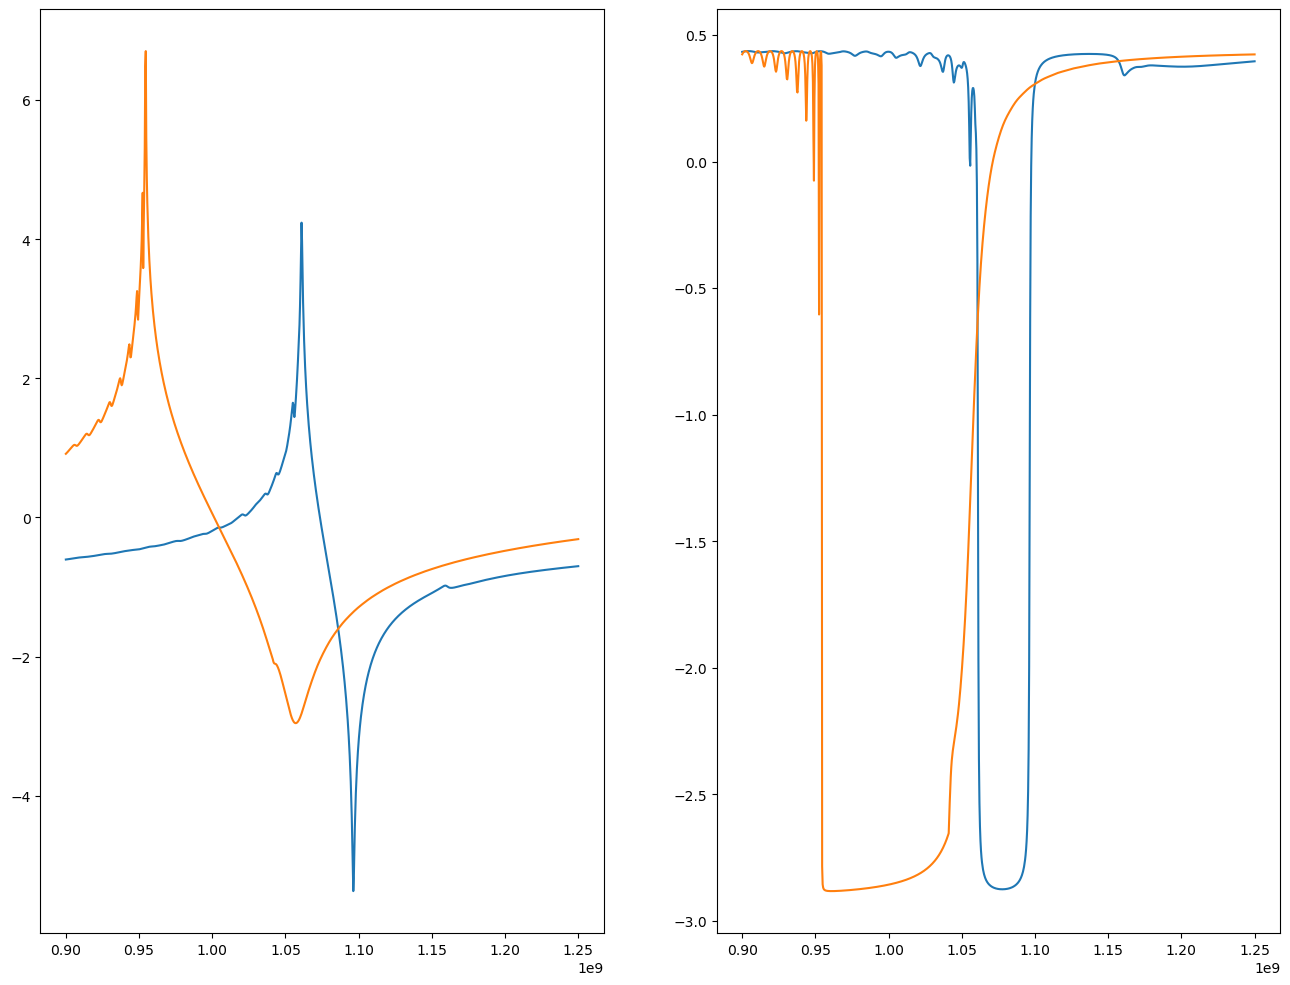

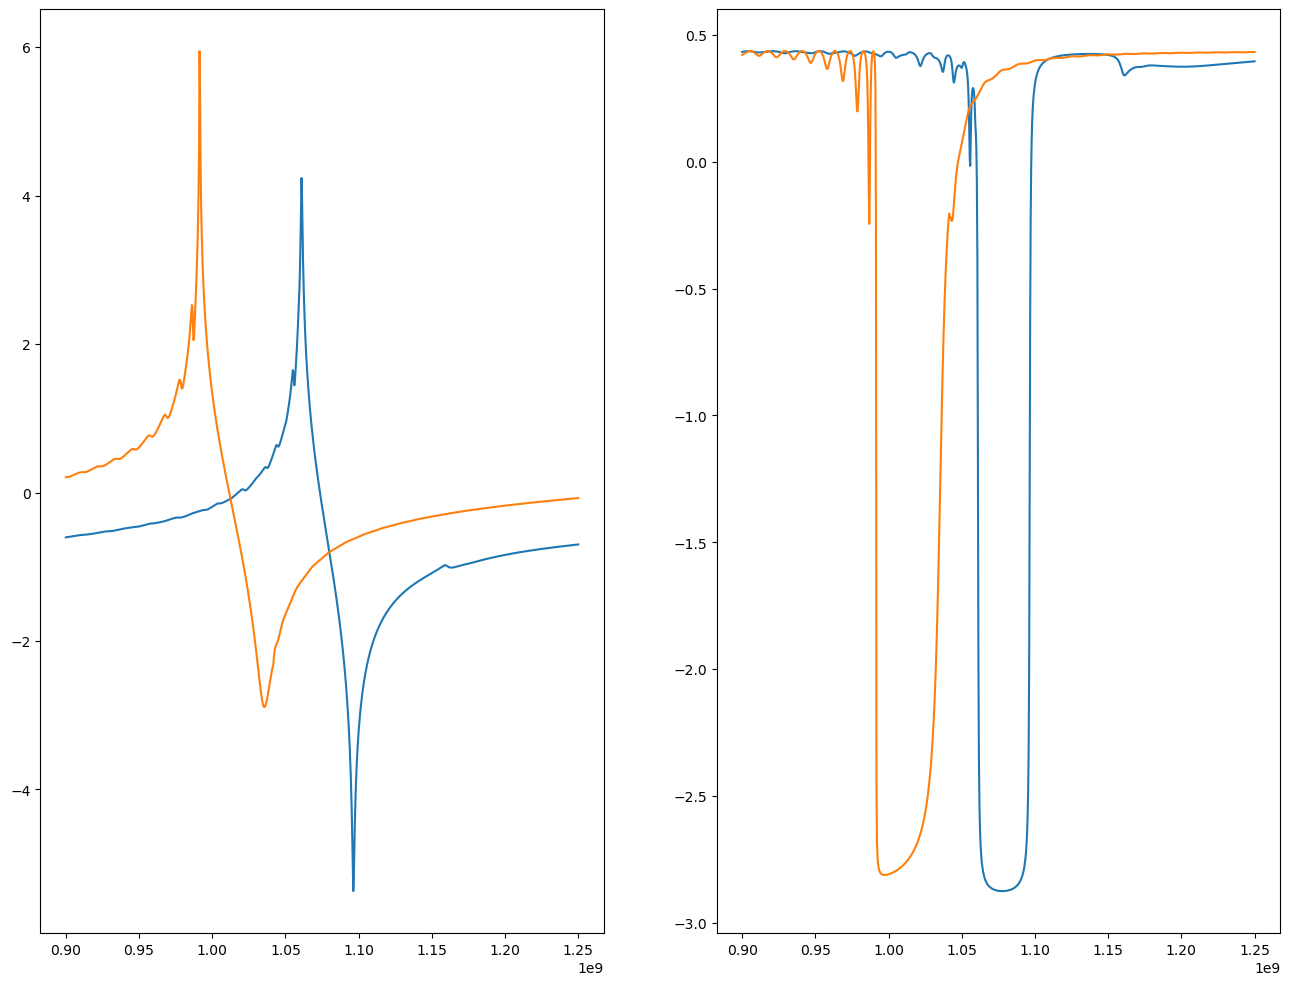

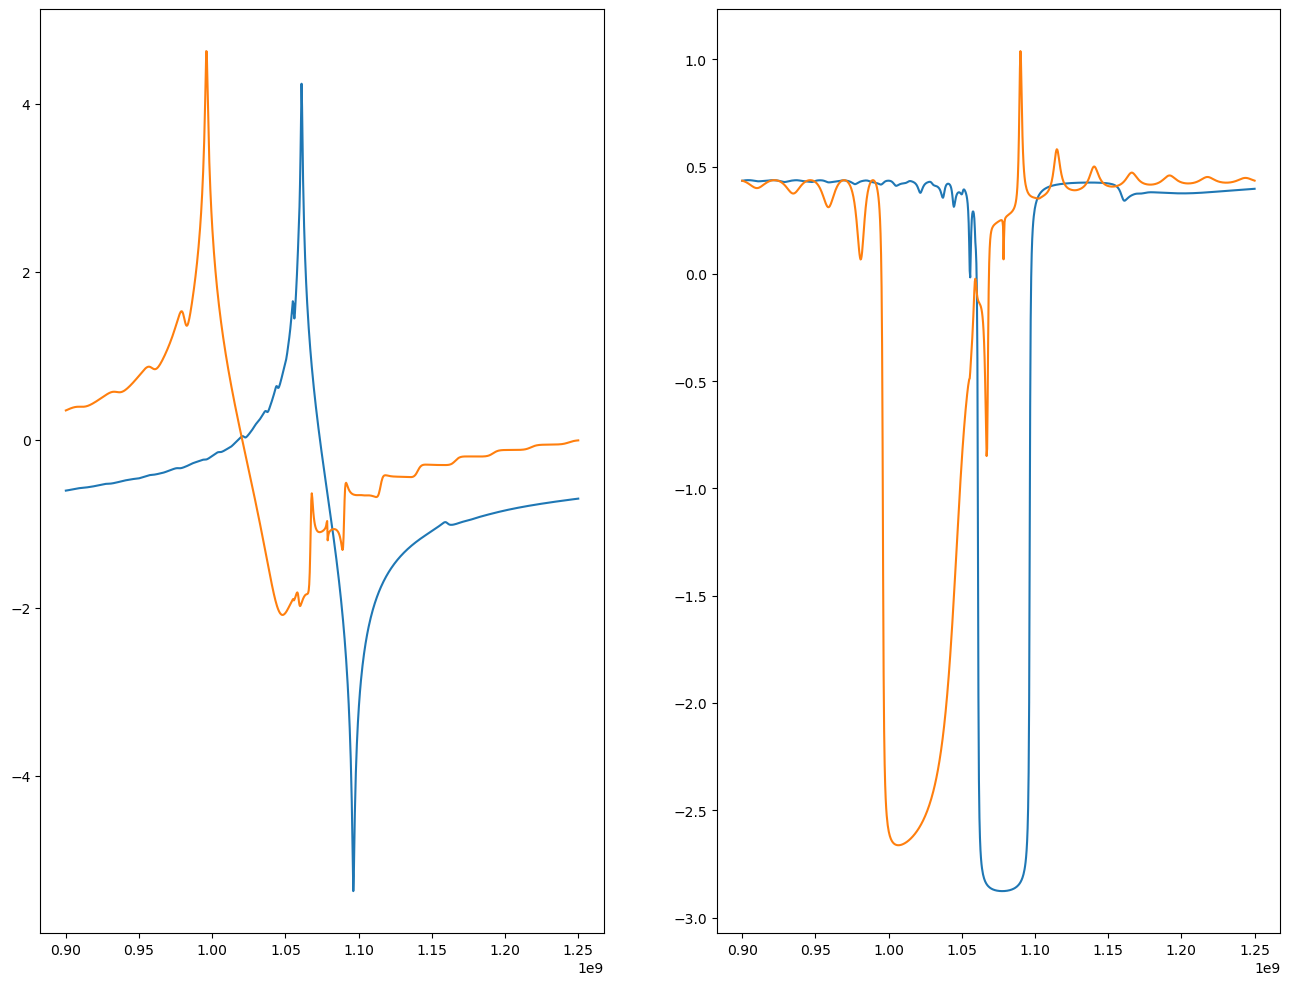

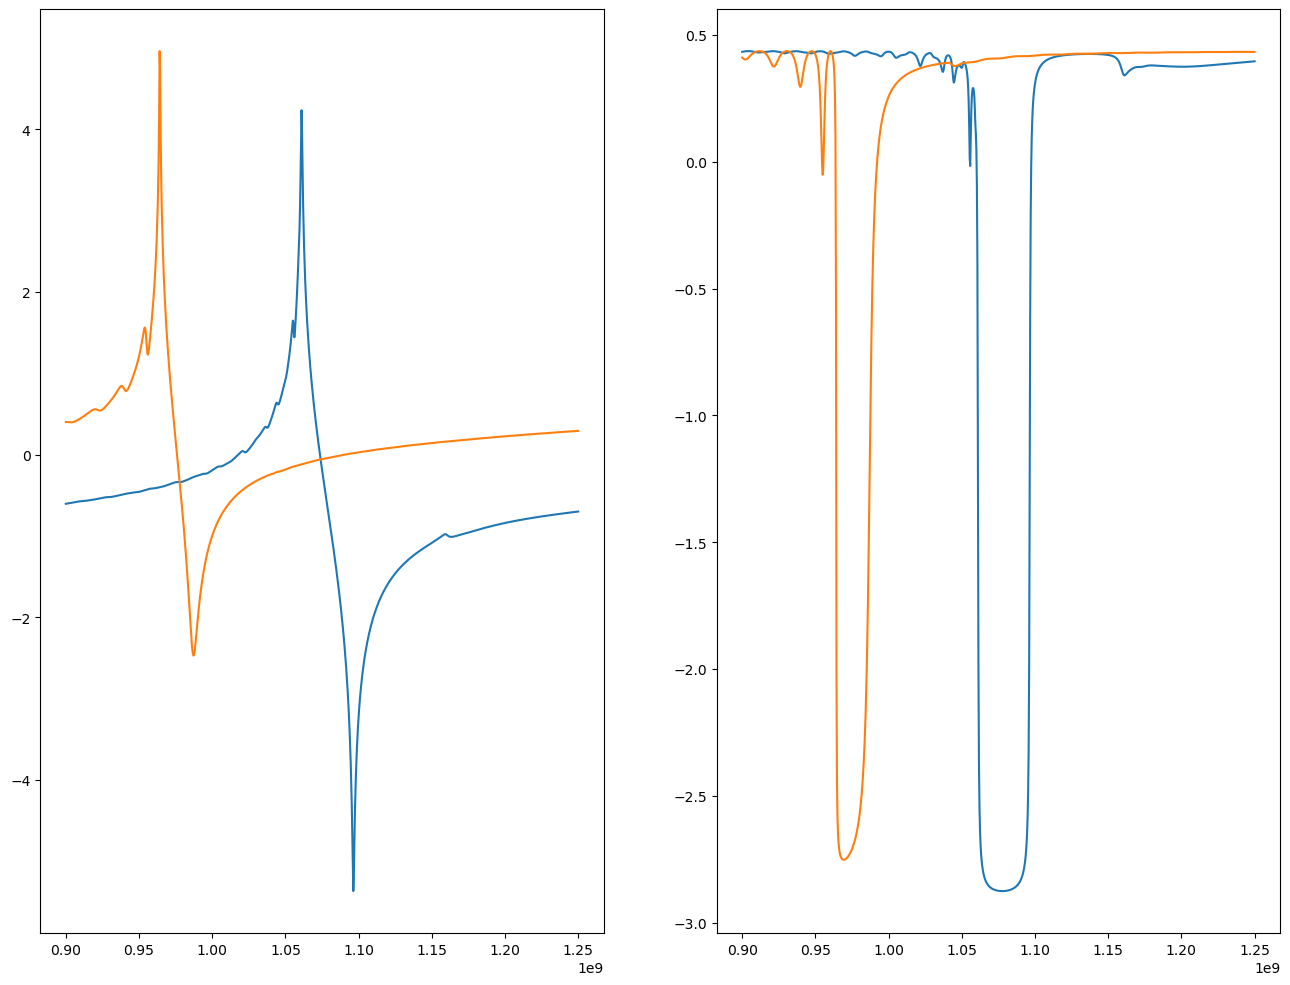

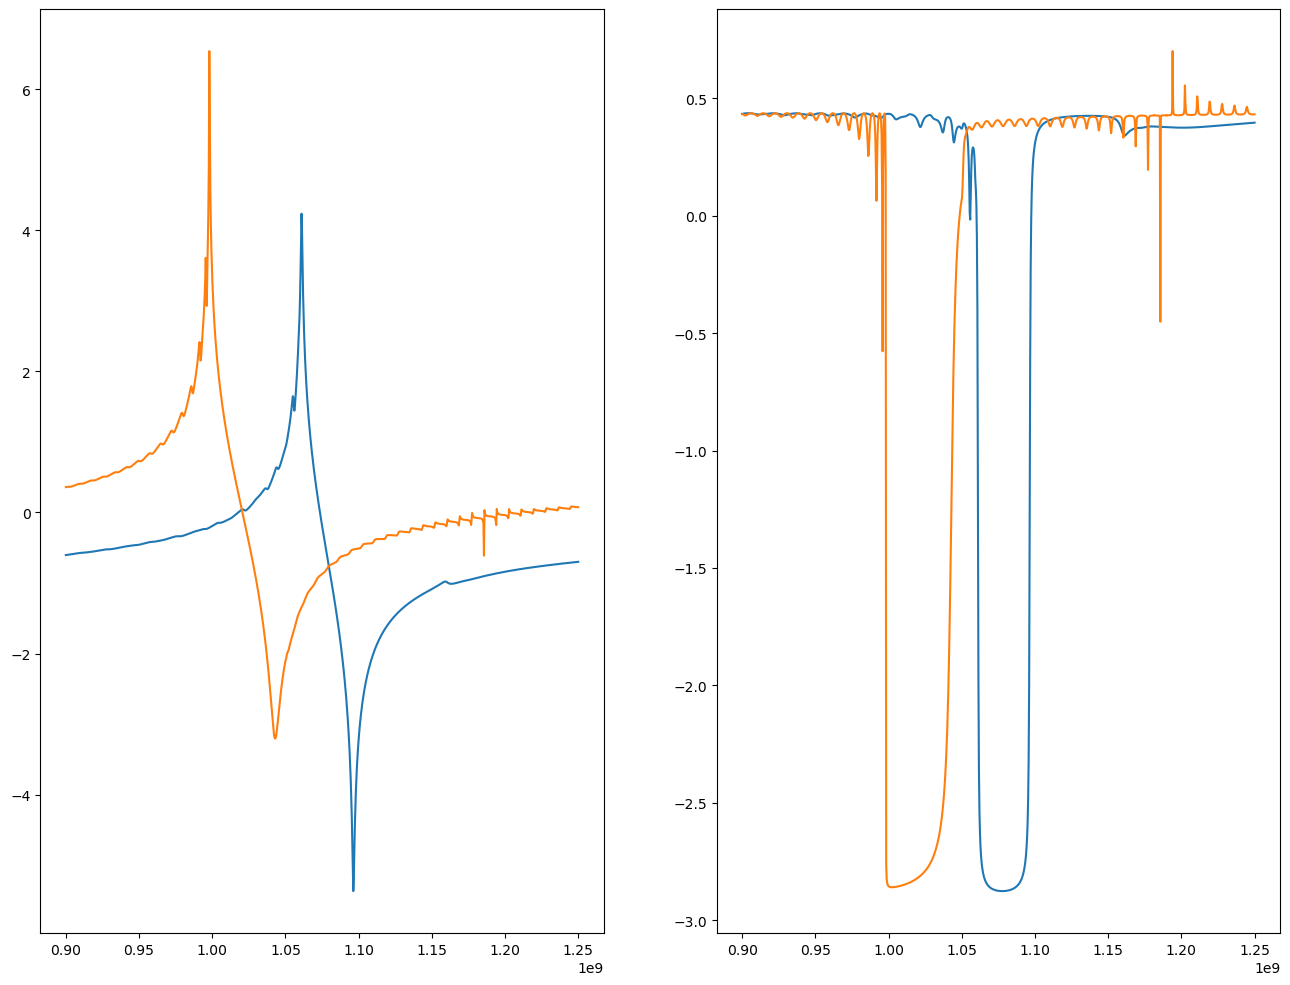

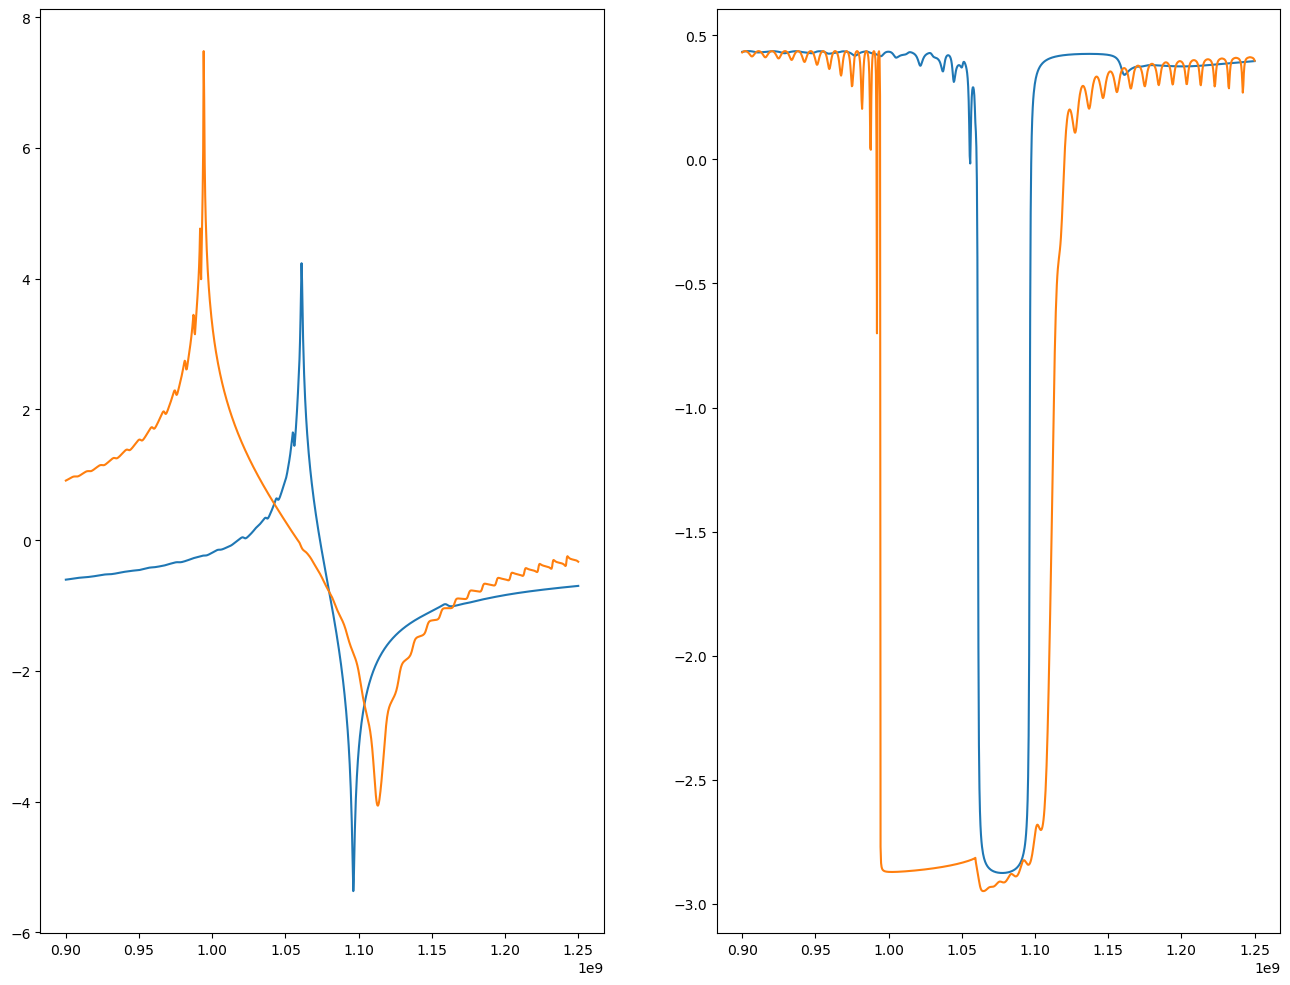

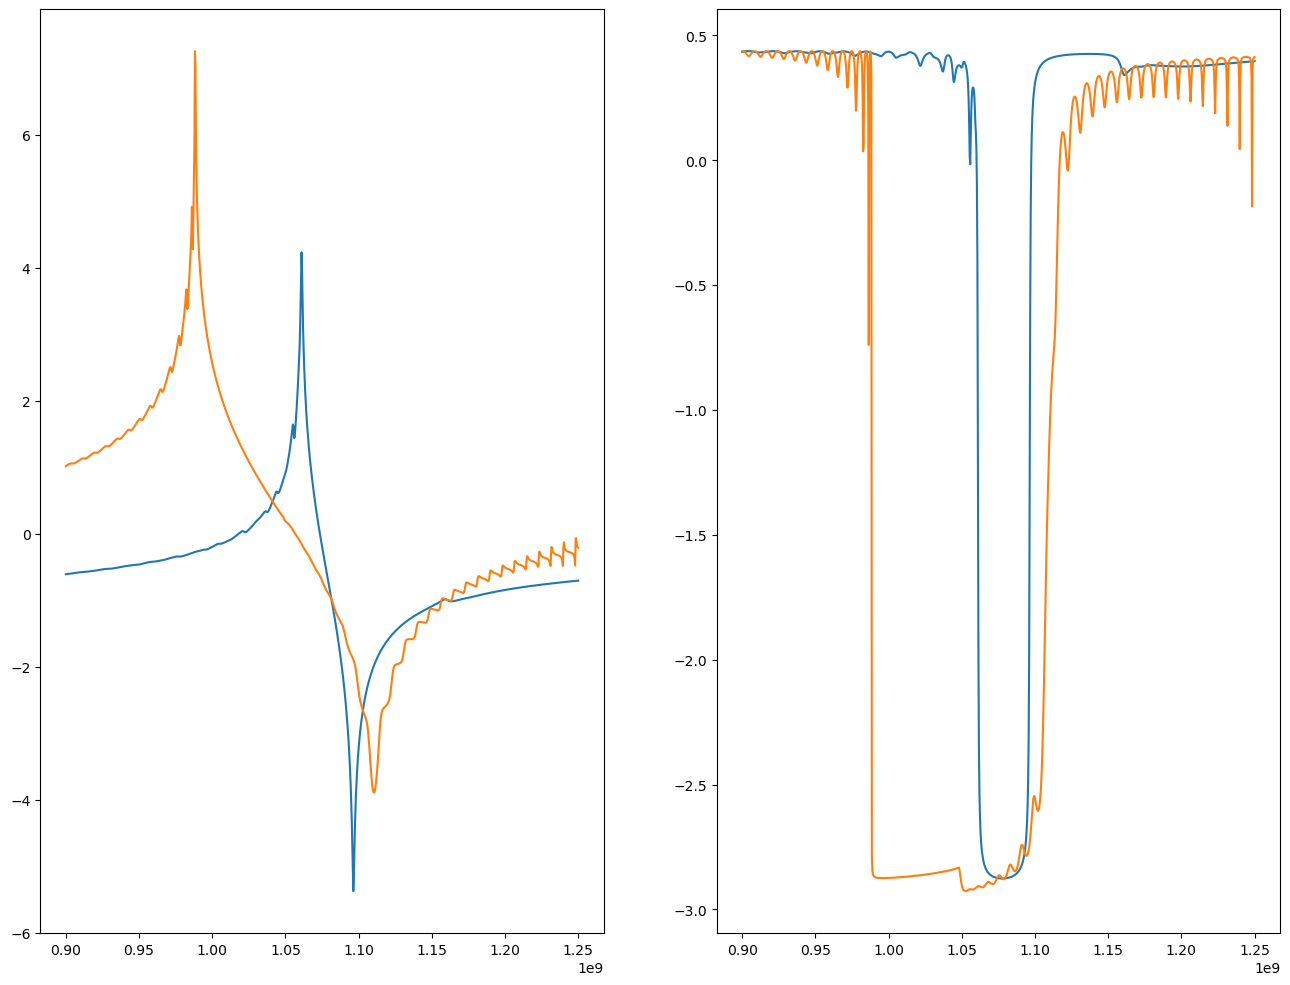

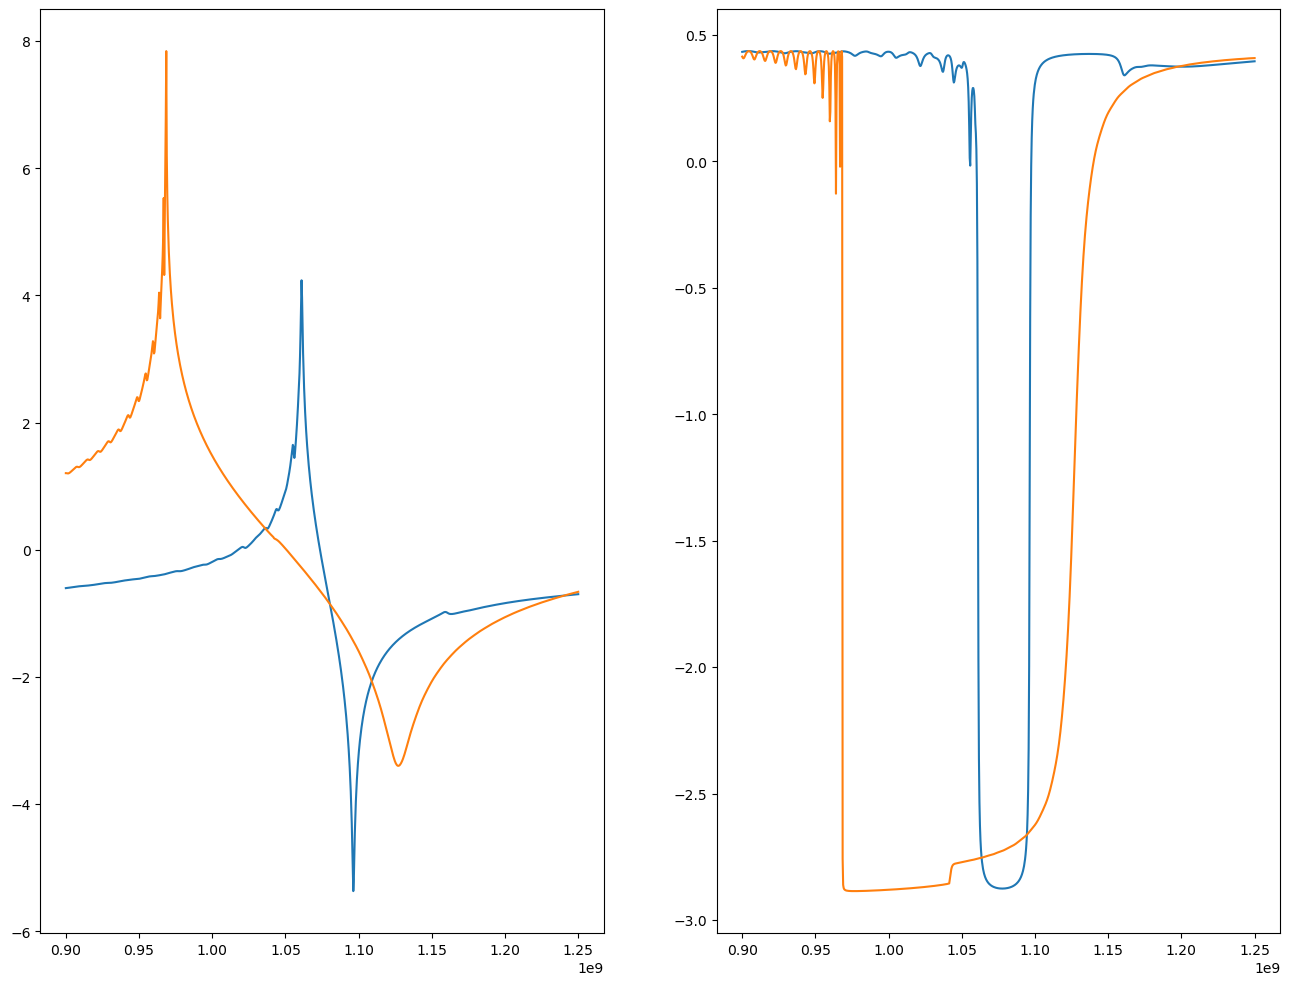

In [53]:
from matplotlib import pyplot as plt


freq = np.linspace(0.9E9, 1.25E9, 1001)
# plt.ion()
for i in range(8):
    plt.figure(figsize=[16, 12])
    # plt.clf()
    plt.subplot(1,2,1)
    plt.plot(freq, data[i][:,0])
    plt.plot(freq, traset[i][:,0])
    plt.subplot(1,2,2)
    plt.plot(freq, data[i][:,1])
    plt.plot(freq, traset[i][:,1])
    plt.show(block=False)

In [55]:
file_path = './datas/test/8s.npy'
with open(file_path,'wb')as f:
    np.save(f,data)